In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MNIST Data.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop('label', axis = 1)
Y = df['label']

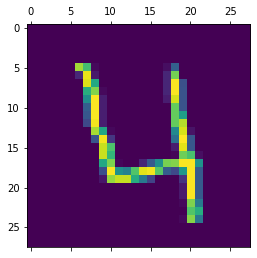

In [5]:
pic = np.array(X[3:4:])
plt.matshow(pic.reshape(28,28))

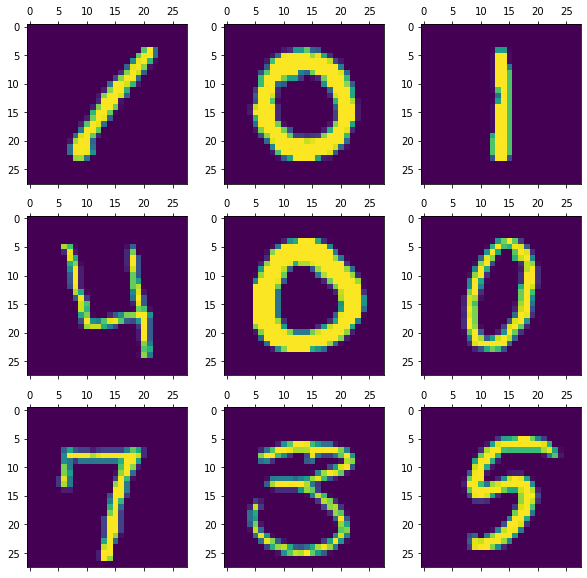

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
Name: label, dtype: int64


In [6]:
fig, ax = plt.subplots(3,3, figsize = (10,10))

for i,j,k in zip(range(9), [0,0,0,1,1,1,2,2,2], [0,1,2]*3):
    
    pic = np.array(X[i:i+1:])
    ax[j, k].matshow(pic.reshape(28,28))

plt.show()
print(Y.head(9))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

x_train = x_train/255
x_test = x_test/255

In [8]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1050/1050 [==============================] - 1s 742us/step - loss: 0.3571 - accuracy: 0.9023
Epoch 2/10
1050/1050 [==============================] - 1s 710us/step - loss: 0.1738 - accuracy: 0.9496
Epoch 3/10
1050/1050 [==============================] - 1s 723us/step - loss: 0.1267 - accuracy: 0.96300s - los
Epoch 4/10
1050/1050 [==============================] - 1s 712us/step - loss: 0.0955 - accuracy: 0.9720
Epoch 5/10
1050/1050 [==============================] - 1s 709us/step - loss: 0.0773 - accuracy: 0.9770
Epoch 6/10
1050/1050 [==============================] - 1s 716us/step - loss: 0.0641 - accuracy: 0.9799
Epoch 7/10
1050/1050 [==============================] - 1s 697us/step - loss: 0.0538 - accuracy: 0.9834
Epoch 8/10
1050/1050 [==============================] - 1s 699us/step - loss: 0.0442 - accuracy: 0.9871
Epoch 9/10
1050/1050 [==============================] - 1s 701us/step - loss: 0.0375 - accuracy: 0.9889
Epoch 10/10
1050/1050 [==============================] -

In [9]:
model.evaluate(x_test, y_test)

263/263 [==============================] - 0s 669us/step - loss: 0.1096 - accuracy: 0.9713


[0.10955263674259186, 0.9713095426559448]

In [10]:
ypred = model.predict(x_test)
np.argmax(ypred[0])

3

In [11]:
ypred_labels = [np.argmax(i) for i in ypred]

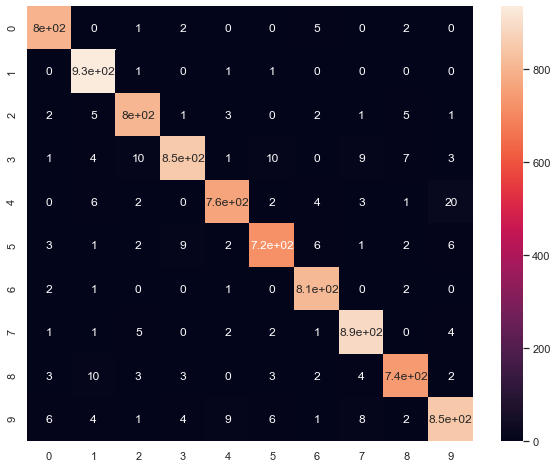

In [12]:
from tensorflow import math
import seaborn as sns
sns.set()

cm = math.confusion_matrix(labels =y_test, predictions = ypred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       806
           1       0.97      1.00      0.98       937
           2       0.97      0.98      0.97       824
           3       0.98      0.95      0.96       898
           4       0.98      0.95      0.96       802
           5       0.97      0.96      0.96       751
           6       0.97      0.99      0.98       816
           7       0.97      0.98      0.98       903
           8       0.97      0.96      0.97       773
           9       0.96      0.95      0.96       890

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

